<a href="https://colab.research.google.com/github/hikmatilloahatov/Azarbaijan-supermarkets-data-visualizations/blob/main/N%C9%99rimanov_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019-yil uchun "Nərimanov-2" supermarketidagi savdo holati


In [57]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [58]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/N%C9%99rimanov-2.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,DONDURMA MILLENNIUM 1KG YUBILEY QOZ-VANIL-KAR....,Muzqaymoq,8.60,2019-02-04,True
1,KAI DA GLASS MEYVE QABI 3040-1,Maishiy buyumlar,13.55,2019-02-04,True
2,OZIBOX STARS SURPRIZ YUMURTA XXL,Shirinliklar,9.00,2019-02-04,True
3,POBEDA 90GR SOKOLAD MOL.NIY VIZRIVNIE PCELK PL...,Shirinliklar,1.48,2019-02-04,True
4,SIRAB 1.5LT MINERAL SU PL/Q,Suvlar,0.90,2019-02-04,True
5,DANONE AKTIVIA 250GR YOQURT BANAN-OVSYANKA PL/Q,Yogurt,2.45,2019-02-04,True
6,AVSAR 200ML GAZOZ QAZLI SU S/Q,Suvlar,1.10,2019-02-04,True
7,YORK FIRCA QAB TEMIZLEMEK UCUN ART.NR041050,Maishiy buyumlar,1.34,2019-01-02,True
8,PAREX POL TAXTASI+PASPAS HEDIYYE 6.,Maishiy buyumlar,2.26,2019-01-02,True
9,HELLO KITTY HAPPY BIRTHDAY 4-LU SAM DESTI,Bayram uchun aksessuarlar,4.46,2019-01-02,True


In [59]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20919 entries, 0 to 20918
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20919 non-null  object 
 1   mahsulot_turi   20919 non-null  object 
 2   mahsulot_narhi  20919 non-null  float64
 3   sotilgan_vaqti  20919 non-null  object 
 4   bonus_karta     20919 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 674.3+ KB


In [60]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [61]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20919 entries, 0 to 20918
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20919 non-null  object        
 1   mahsulot_turi   20919 non-null  object        
 2   mahsulot_narhi  20919 non-null  float64       
 3   sotilgan_vaqti  20919 non-null  datetime64[ns]
 4   bonus_karta     20919 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 674.3+ KB


In [62]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

1983
1999
2151
1976
2329
1999
2046
2183
2138
2100
15
0


In [63]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

1983
1999
2151
1976
2329
1999
2046
2183
2138
2100
0
0


In [64]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,DONDURMA MILLENNIUM 1KG YUBILEY QOZ-VANIL-KAR....,Muzqaymoq,8.60,2019-02-04,True
1,KAI DA GLASS MEYVE QABI 3040-1,Maishiy buyumlar,13.55,2019-02-04,True
2,OZIBOX STARS SURPRIZ YUMURTA XXL,Shirinliklar,9.00,2019-02-04,True
3,POBEDA 90GR SOKOLAD MOL.NIY VIZRIVNIE PCELK PL...,Shirinliklar,1.48,2019-02-04,True
4,SIRAB 1.5LT MINERAL SU PL/Q,Suvlar,0.90,2019-02-04,True
...,...,...,...,...,...
20914,MULLBEUTEL 40LI 48*50SM ZIBIL TORBASI IPLI,Maishiy buyumlar,2.89,2019-09-05,True
20915,BAGDAT 50GR DARCIN PAKET,Ziravorlar,1.79,2019-09-05,True
20916,KENT 100GR BULYON TOZ ET BULYON,Ziravorlar,0.90,2019-09-05,True
20917,DONDURMA TITANIK 500GR OLIMPIYA PLOMBIR 12% POSET,Muzqaymoq,2.80,2019-09-05,True


In [66]:
#9 2019-yilda "Nərimanov-2" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4801
Maishiy buyumlar,1163
"Yuvish vositalari, tozalagichlar",1078
Mevali sharbatlar,909
Idish-tovoq,779
...,...
Suzma,19
Shampan,17
Kefir,17
Tayyor ovqatlar,15


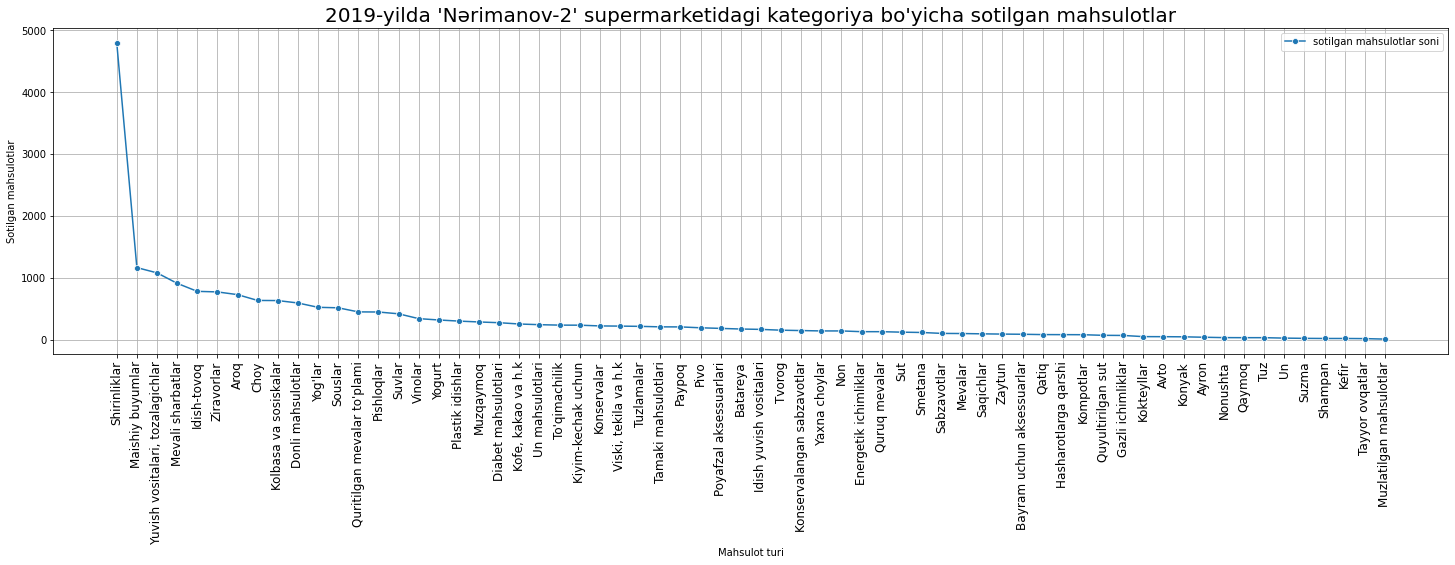

In [67]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Nərimanov-2' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [68]:
#10 2019-yilda "Nərimanov-2" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,11391.55
Avto,258.19
Ayron,26.34
Batareya,686.60
Bayram uchun aksessuarlar,246.28
...,...
Yog'lar,4550.40
Yogurt,422.49


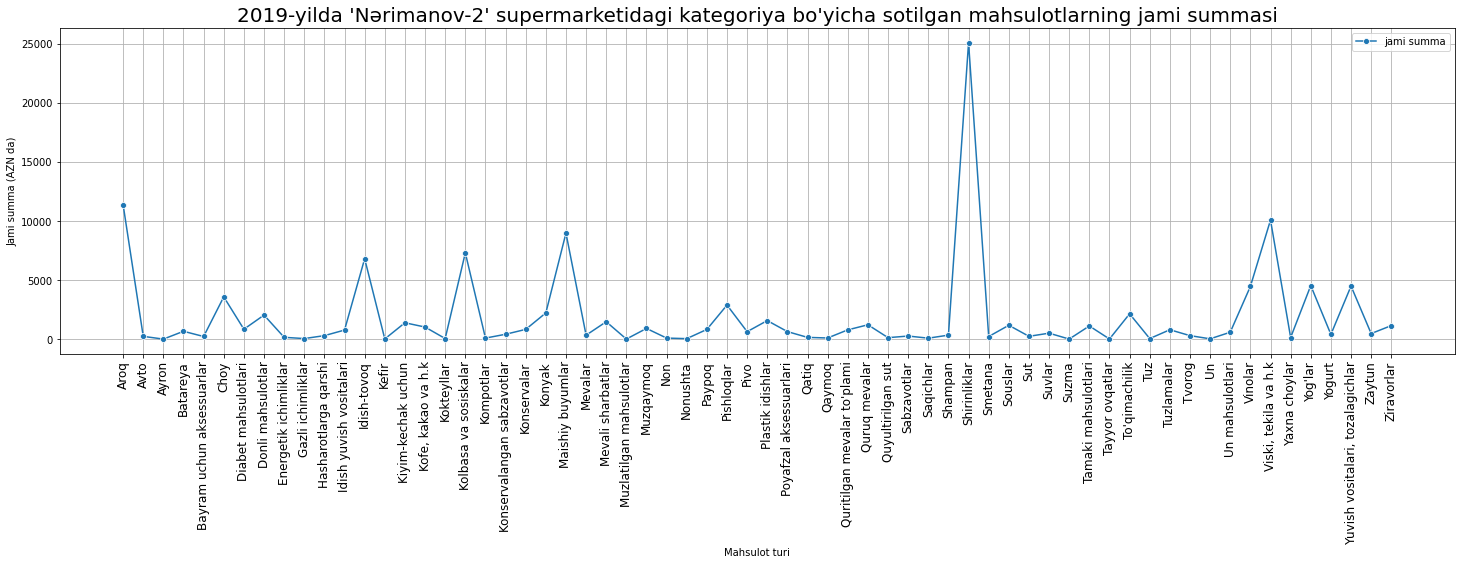

In [69]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Nərimanov-2' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [70]:
#11 2019-yilda "Nərimanov-2" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10563,10341


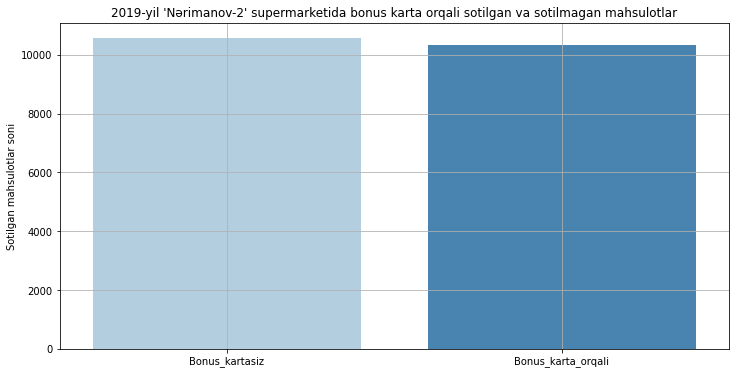

In [71]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Nərimanov-2' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [72]:
#12 2019-yilda "Nərimanov-2" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,1983
Fevral,1999
Mart,2151
Aprel,1976
May,2329
Iyun,1999
Iyul,2046
Avgust,2183
Sentabr,2138
Oktabr,2100


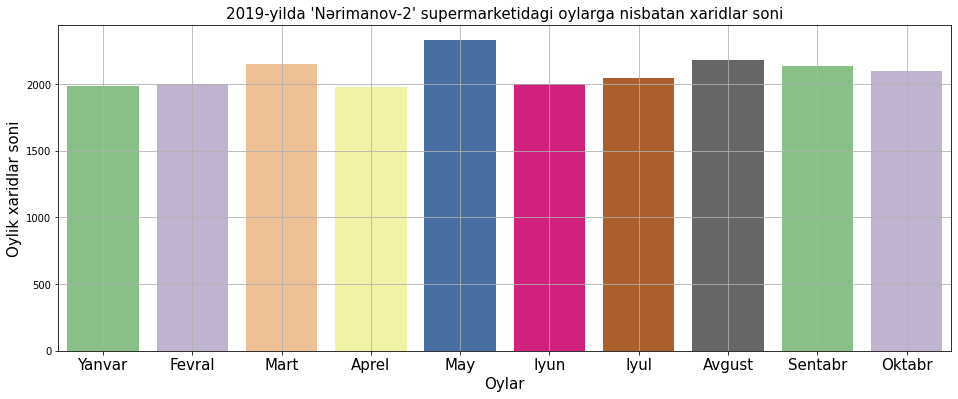

In [75]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Nərimanov-2' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [76]:
#13 2019-yilda "Nərimanov-2" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,2857
Seshanba,2806
Chorshanba,3044
Payshanba,3049
Juma,3289
Shanba,3176
Yakshanba,2683


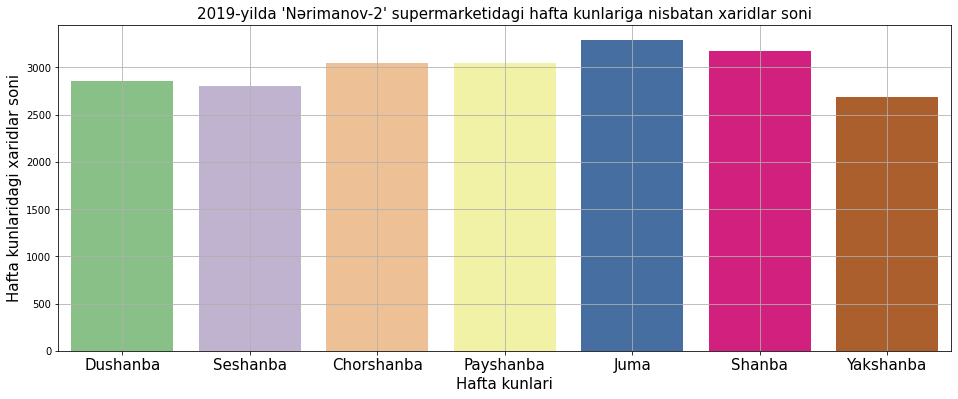

In [77]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Nərimanov-2' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [78]:
#14 2019-yilda "Nərimanov-2" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,614
2,676
3,600
4,678
5,832
6,711
7,724
8,674
9,706
10,707


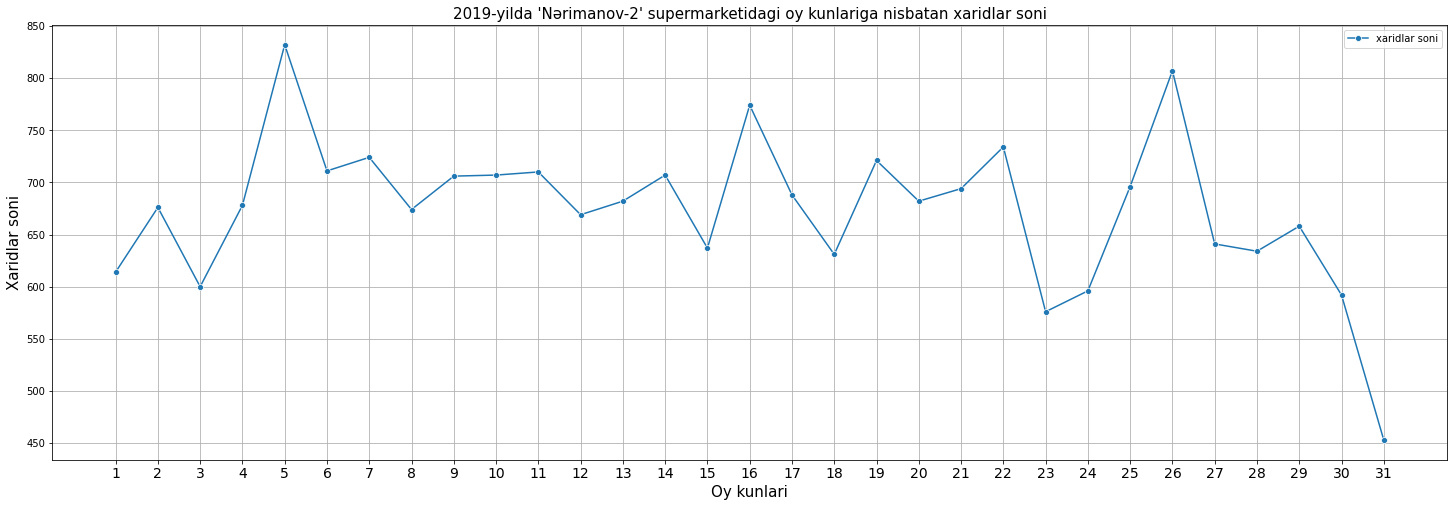

In [79]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Nərimanov-2' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [80]:
#15 2019-yil 'Nərimanov-2' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [81]:
len(oy_sanalari)

310

In [82]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [83]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [84]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,53,66,52,80,68,84,46,63,67,103,74,77,62,25,39,107,69,48,92,70,54,65,31,46,62,60,47,63,77,74,59
Fevral,87,51,52,62,91,81,67,95,81,70,72,53,73,132,73,97,52,70,79,52,54,85,70,86,58,49,80,27,0,0,0
Mart,68,60,68,66,19,53,74,61,78,51,81,97,116,109,86,103,44,88,82,92,61,101,39,59,48,57,54,61,76,43,56
Aprel,54,28,48,46,76,71,47,65,47,88,61,98,51,48,65,100,78,50,77,53,65,45,48,52,115,103,71,86,83,57,0
May,83,100,73,65,101,96,129,80,66,42,88,49,54,61,46,57,96,77,54,75,88,70,71,97,81,113,47,45,50,50,125
Iyun,48,68,80,75,105,72,69,65,67,59,69,54,68,67,53,48,77,36,54,76,90,77,65,47,60,61,76,70,81,62,0
Iyul,79,48,51,67,99,85,41,84,78,72,77,15,71,61,80,79,66,53,98,74,78,59,48,35,52,97,73,62,83,32,49
Avgust,49,87,61,97,54,80,98,52,94,53,36,81,74,50,68,33,73,79,39,102,82,76,65,69,57,57,72,66,62,127,90
Sentabr,44,68,43,77,109,54,114,53,81,80,64,47,72,69,71,84,38,88,68,54,58,117,84,69,89,81,68,71,50,73,0
Oktabr,49,100,72,43,110,35,39,56,47,89,88,98,41,85,56,66,95,42,78,34,64,39,55,36,74,129,53,83,96,74,74


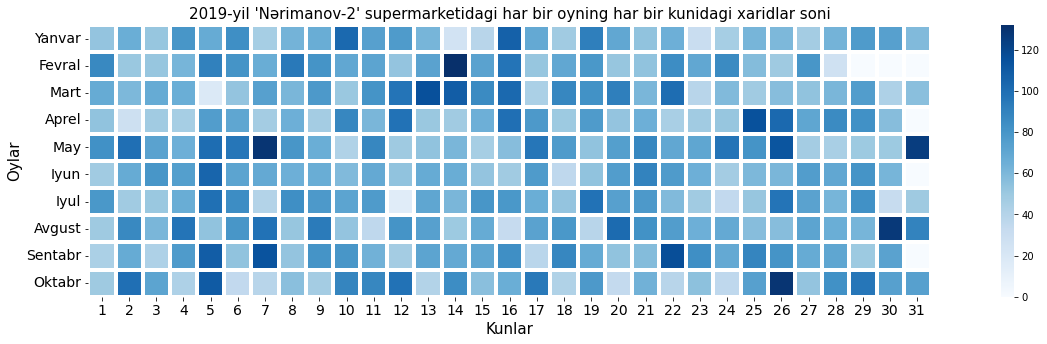

In [85]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Nərimanov-2' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

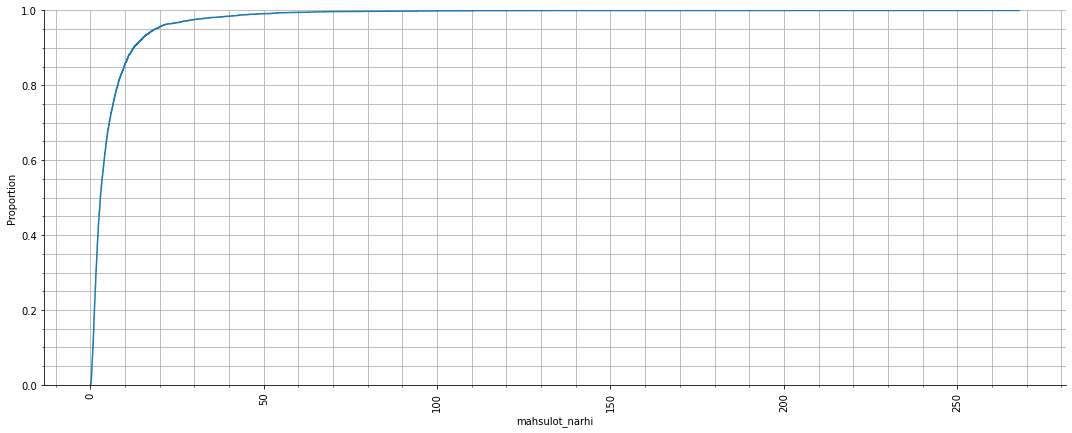

In [87]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 2 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()